In [2]:
import emcee
%matplotlib inline
import numpy as np
import pylab as mplot
from pylab import cm
import seaborn as sns
sns.set_style("whitegrid")
#import triangle
import scipy.optimize as op
from splashback_utils import *
from scipy import stats

# Read in data

In [6]:
data = np.load('/Users/chihwaychang/Dropbox/splashback_measurements/cc_measurements/v5/splashback_cov_l10_20_fiducial.npz')
# data = np.load('~/Dropbox/Work/splashback/cc_measurements/splashback_cov_lgt20.npz')

# print data.files
sigmag = data['sg_mean']
sigmag_sig = data['sg_sig']
sigmag_cov = data['cov']
rperp = data['r_data'] 

# data = np.load('/Users/chihwaychang/Dropbox/Work/splashback/cc_measurements/splashback_crosscheck_lgt20_more_magcut_nophotoz.npz')
# sigmag = data['sigmag']
# sigmag_sig = data['sigmag_sig']
# sigmag_cov = data['cov']
# rperp = data['R'] 

/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


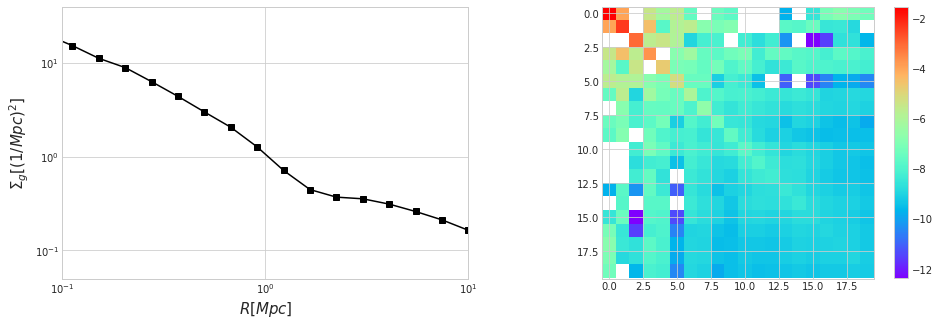

In [7]:
mplot.figure(figsize=(16,5))
mplot.subplot(121)
mplot.errorbar(rperp, sigmag, yerr=sigmag_sig, color='k', marker='s')
mplot.xlabel('$R [Mpc]$', fontsize=15)
mplot.ylabel('$\Sigma_{g} [(1/Mpc)^2]$', fontsize=15)
mplot.xscale('log')
mplot.yscale('log')
mplot.ylim(0.05,40)
mplot.xlim(0.1,10)
mplot.subplot(122)
mplot.imshow(np.log(sigmag_cov), cmap=cm.rainbow)
mplot.colorbar()

# Set initial parameters

In [8]:
h0 = 0.7
z_max = 40./h0
minz_to_integrate = 0.0
maxz_to_integrate = z_max
num_z_tointegrate = 500
z = np.linspace(minz_to_integrate, maxz_to_integrate, num = num_z_tointegrate)

# this is always fixed!
r_o = 1.5/h0

# ML fit (w splashback)

In [9]:
# splashback

log_alpha = -0.32085983 -0.1
log_beta = 0.16309539
log_gamma = 0.64815634
log_r_s = 0.85387196 -0.1
log_r_t = 0.08325509 
log_rho_0 = -0.8865869 -0.5
log_rho_s = -0.19838697 -0.3
se = 1.3290722

# alpha, beta, gamma, r_s, r_t, rho_0, rho_s, se
params = np.array([log_alpha, log_beta, log_gamma, log_r_s, log_r_t, log_rho_0, log_rho_s, se])
lin_params = np.array([10**log_alpha, 10**log_beta, 10**log_gamma, 10**log_r_s, 10**log_r_t, 10**log_rho_0, 10**log_rho_s, se])

In [11]:
#Best model with splashback feature
nll = lambda *args: -1*lnlikelihood(*args)

p0 = params.copy()
bounds = ((None, None), (None,None), (None,None), (np.log10(0.1/h0), np.log10(5.0/h0)), (np.log10(0.1/h0), np.log10(5.0/h0)), (None,None), (None,None), (-10., 10.))
data_vec = sigmag.copy()
invcov = np.linalg.inv(sigmag_cov.copy())
result = op.minimize(nll, p0, args=(rperp, z, data_vec, invcov, h0, 1), options = {'maxiter':200}, bounds = bounds)
best_params = result.x
best_lnlike = -result.fun

print(result)
print(best_lnlike)

      fun: -30.04164837174896
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00239808,  0.00469385, -0.00815525, -0.00485407, -0.00719069,
        0.00338716, -0.00193516, -0.02156249])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1656
      nit: 150
   status: 0
  success: True
        x: array([-0.80059169,  0.8114647 ,  0.98978132, -0.57210397,  0.14434797,
       -1.40866746,  0.9036318 ,  1.39225438])
30.04164837174896


# ML fit (w/o splashback)

In [486]:
# this is good for no splsh
log_alpha = -0.32085983 +0.5
log_r_s = 0.85387196 -1
log_rho_0 = -0.8865869 -1.3 
log_rho_s = -0.19838697 +0.6
se = 1.3290722 -1

# alpha, r_s, rho_0, rho_s, se
params_nosplash = np.array([log_alpha, log_r_s, log_rho_0, log_rho_s, se])
lin_params_nosplash = np.array([10**log_alpha, 10**log_r_s, 10**log_rho_0, 10**log_rho_s, se])

In [487]:
#Best model with no splashback feature
nll_nosplash = lambda *args: -1*lnlikelihood(*args)
p0_nosplash = params_nosplash.copy()
bounds_nosplash = ((None,None), (np.log10(0.1/h0), np.log10(5.0/h0)), (None,None), (None, None), (-10., 10.))
data_vec = sigmag.copy()
invcov = np.linalg.inv(sigmag_cov.copy())
result_nosplash = op.minimize(nll_nosplash, p0_nosplash, args=(rperp, z, data_vec, invcov, h0, 0), bounds = bounds_nosplash)

best_params_nosplash = result_nosplash.x
best_lnlike_nosplash = -result_nosplash.fun

print result_nosplash
print best_lnlike_nosplash

      fun: 1.5571077401009548
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.0015959 ,  0.00953122,  0.00054285,  0.00356266,  0.00061959])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 246
      nit: 33
   status: 0
  success: True
        x: array([-0.35361402, -0.585086  , -1.81154638,  0.6649884 ,  1.29549352])
-1.5571077401


# Plot all this

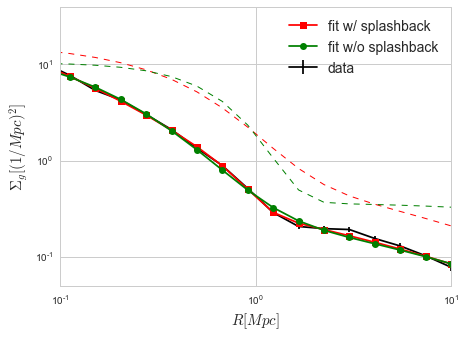

In [488]:
mplot.figure(figsize=(7,5))

mplot.errorbar(rperp, sigmag, yerr=sigmag_sig, label='data', color='k')
mplot.semilogx(rperp, Sigmag(rperp, z, p0, h0, 1), color='r', ls='--', lw=1)
mplot.semilogx(rperp, Sigmag(rperp, z, best_params, h0, 1), label='fit w/ splashback', color='r', marker='s')
mplot.semilogx(rperp, Sigmag(rperp, z, p0_nosplash, h0, 0), color='g', ls='--', lw=1)
mplot.semilogx(rperp, Sigmag(rperp, z, best_params_nosplash, h0, 0), label='fit w/o splashback', color='g', marker='o')

mplot.xlabel('$R [Mpc]$', fontsize=15)
mplot.ylabel('$\Sigma_{g} [(1/Mpc)^2]$', fontsize=15)
mplot.xscale('log')
mplot.yscale('log')
mplot.ylim(0.05,40)
mplot.xlim(0.1,10)

mplot.legend(fontsize=14)

# Look at log derivative

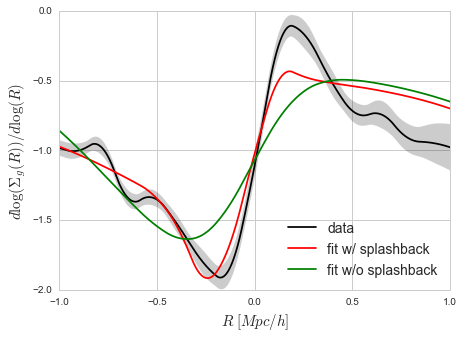

In [489]:
mplot.figure(figsize=(7,5))
ax = mplot.subplot(111)

r1, dsdr1 = derivative_savgol(rperp, sigmag, N=10000, window_length=5, polyorder=3)
r2, dsdr2 = derivative_savgol(rperp, Sigmag(rperp, z, best_params, h0, 1), N=10000, window_length=5, polyorder=3)
r3, dsdr3 = derivative_savgol(rperp, Sigmag(rperp, z, best_params_nosplash, h0, 0), N=10000, window_length=5, polyorder=3)

mplot.plot(r1+np.log10(h0), dsdr1, color='k', label='data')
mplot.plot(r2+np.log10(h0), dsdr2, color='r', label='fit w/ splashback')
mplot.plot(r3+np.log10(h0), dsdr3, color='g', label='fit w/o splashback')
ax.fill_between(data['r2']+np.log10(h0), np.log10(10**(data['dlnsg_mean_sm']-data['dlnsg_std_sm'])), 
                 np.log10(10**(data['dlnsg_mean_sm']+data['dlnsg_std_sm'])), facecolor='k', 
                 edgecolor='white', alpha=0.2, interpolate=True)

mplot.ylim(-2,0)
mplot.xlim(-1,1)
mplot.legend(fontsize=14, loc='lower right')
mplot.ylabel('$d\log(\Sigma_{g}(R))/d\log(R)$', fontsize=15)
mplot.xlabel('$R \;[Mpc/h]$', fontsize=15)



# Likelihood ratio test

In [490]:
bigD = 2.*(best_lnlike - best_lnlike_nosplash)
df = len(best_params) - len(best_params_nosplash)
prob = 1 - stats.chi2.cdf(bigD, df)
zscore = stats.norm.ppf(1-prob/2.0)

print best_lnlike, best_lnlike_nosplash, prob, zscore

41.2032328262 -1.5571077401 0.0 inf


In [491]:
print stats.chi2.cdf(bigD, df)

1.0


In [492]:
# new data lgt20
# 45.8004562662 8.71600506227 5.55111512313e-16 8.1258906647
# new data l10_20
# 41.2032328262 -1.5571077401 0.0 inf
# old data lgt20
# 37.7170860377 -56.3869397597 0.0 inf

# consider using less points for the fit?!

# Now consider lensing...

In [442]:
data = np.loadtxt('/Users/chihwaychang/Dropbox/Work/splashback/cs_measurements/test_l10_20_comoving_deltasigma', comments='#')
# print data.files
sigma = data[:,1]*h0**2
sigma_sig = data[:,2]*h0**2
rperp = data[:,0]/h0 
sigma_cov = np.loadtxt('/Users/chihwaychang/Dropbox/Work/splashback/cs_measurements/test_l10_20_comoving_cov')*h0**4

In [547]:
# splashback

log_alpha = -0.32085983 -2
log_beta = 0.16309539 +0.1
log_gamma = 0.64815634 +0.1
log_r_s = -0.1 #0.85387196 -0.7
log_r_t = 0.0 # 0.08325509 +0.4
log_rho_0 = -0.8865869 +0.3
log_rho_s = -0.19838697 +1
se = 1.3290722 -0.2

# alpha, beta, gamma, r_s, r_t, rho_0, rho_s, se
params = np.array([log_alpha, log_beta, log_gamma, log_r_s, log_r_t, log_rho_0, log_rho_s, se])
lin_params = np.array([10**log_alpha, 10**log_beta, 10**log_gamma, 10**log_r_s, 10**log_r_t, 10**log_rho_0, 10**log_rho_s, se])

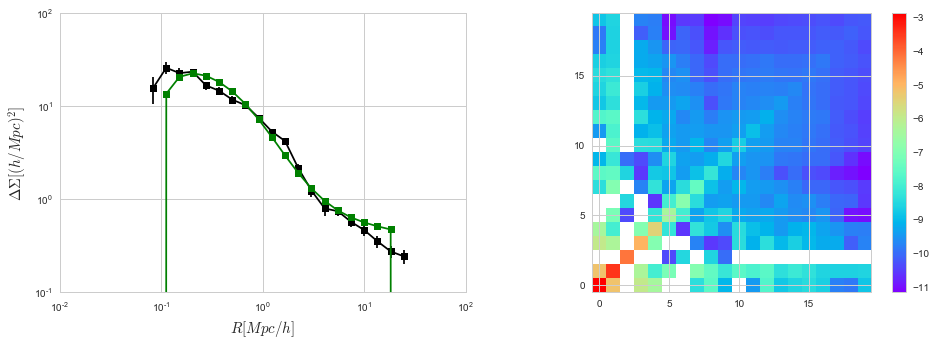

In [548]:
mplot.figure(figsize=(16,5))
mplot.subplot(121)
mplot.errorbar(rperp, sigma, yerr=sigma_sig, color='k', marker='s')
mplot.plot(rperp, DSigmag(rperp, z, params, h0, 1), label='fit', color='g', marker='s')
mplot.xlabel('$R [Mpc/h]$', fontsize=15)
mplot.ylabel('$\Delta \Sigma [(h/Mpc)^2]$', fontsize=15)
mplot.xscale('log')
mplot.yscale('log')
# mplot.ylim(0.1,100)
# mplot.xlim(0.1,10)
mplot.subplot(122)
mplot.imshow(np.log(sigmag_cov), cmap=cm.rainbow)
mplot.colorbar()


# assume these are with h's

(-2, 0)

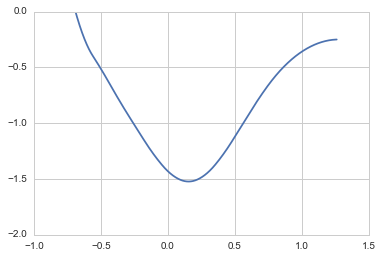

In [549]:
r1, dsdr1 = derivative_savgol(rperp[1:-1], DSigmag(rperp, z, params, h0, 1)[1:-1], N=10000, window_length=5, polyorder=3)
mplot.plot(r1,dsdr1)
mplot.ylim(-2,0)

# ML fit w/splashback

In [552]:
# splashback

log_alpha = -0.32085983 -2
log_beta = 0.16309539 +0.1
log_gamma = 0.64815634 +0.1
log_r_s = -0.1 #0.85387196 -0.7
log_r_t = 0.0 # 0.08325509 +0.4
log_rho_0 = -0.8865869 +0.3
log_rho_s = -0.19838697 +1
se = 1.3290722 -0.2

# alpha, beta, gamma, r_s, r_t, rho_0, rho_s, se
params = np.array([log_alpha, log_beta, log_gamma, log_r_s, log_r_t, log_rho_0, log_rho_s, se])
lin_params = np.array([10**log_alpha, 10**log_beta, 10**log_gamma, 10**log_r_s, 10**log_r_t, 10**log_rho_0, 10**log_rho_s, se])

In [553]:
#Best model with splashback feature
nll = lambda *args: -1*lnlikelihoodD(*args)

p0 = params.copy()
bounds = ((None, None), (None,None), (None,None), (np.log10(0.1/h0), np.log10(5.0/h0)), (np.log10(0.1/h0), np.log10(5.0/h0)), (None,None), (None,None), (-10., 10.))
data_vec = sigma[1:-1].copy()
invcov = np.linalg.inv(sigma_cov[1:-1, 1:-1].copy())
result = op.minimize(nll, p0, args=(rperp[1:-1], z, data_vec, invcov, h0, 1), options = {'maxiter':200}, bounds = bounds)
best_params = result.x
best_lnlike = -result.fun

print result
print best_lnlike
print best_params

      fun: 58.4468099066587
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00099334,  0.00187512, -0.00066791,  0.54693459,  0.00072546,
        0.00708553, -0.00112834, -0.00587121])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1062
      nit: 98
   status: 0
  success: True
        x: array([-0.79403892,  0.65292313,  0.80275031, -0.84509804, -0.05420631,
       -0.59895621,  1.47152778,  2.45934302])
-58.4468099067
[-0.79403892  0.65292313  0.80275031 -0.84509804 -0.05420631 -0.59895621
  1.47152778  2.45934302]


# ML fit w/o splashback

In [554]:
# this is good for no splsh
log_alpha = -0.32085983 - 0.7
log_r_s = 0.85387196 -1.2
log_rho_0 = -0.8865869 -0.8
log_rho_s = -0.19838697 +1.4
se = 1.3290722 

# alpha, r_s, rho_0, rho_s, se
params_nosplash = np.array([log_alpha, log_r_s, log_rho_0, log_rho_s, se])
lin_params_nosplash = np.array([10**log_alpha, 10**log_r_s, 10**log_rho_0, 10**log_rho_s, se])

In [555]:
#Best model with no splashback feature
nll_nosplash = lambda *args: -1*lnlikelihoodD(*args)
p0_nosplash = params_nosplash.copy()

bounds_nosplash = ((None,None), (np.log10(0.1/h0), np.log10(5.0/h0)), (None,None), (None, None), (-10., 10.))
data_vec = sigma[1:-1].copy()
invcov = np.linalg.inv(sigma_cov[1:-1,1:-1].copy())
result_nosplash = op.minimize(nll_nosplash, p0_nosplash, args=(rperp[1:-1], z, data_vec, invcov, h0, 0), bounds = bounds_nosplash)

best_params_nosplash = result_nosplash.x
best_lnlike_nosplash = -result_nosplash.fun

print result_nosplash
print best_lnlike_nosplash

      fun: 104.49410760848457
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-122.3230214 ,  134.2096752 ,    6.09826714,    6.79015244,
          1.32192497])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 144
      nit: 13
   status: 0
  success: True
        x: array([-1.01614439, -0.79170477, -1.69390954,  2.07934064,  1.33504677])
-104.494107608


# Plot all of this

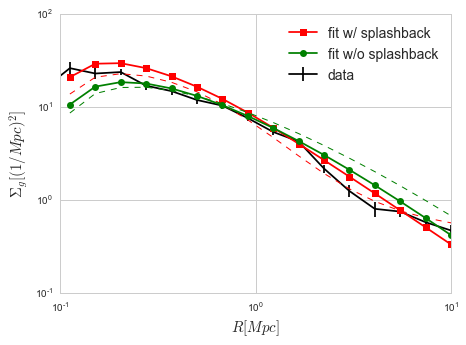

In [556]:
mplot.figure(figsize=(7,5))

mplot.errorbar(rperp, sigma, yerr=sigma_sig, label='data', color='k')
mplot.semilogx(rperp[1:-1], DSigmag(rperp, z, p0, h0, 1)[1:-1], color='r', ls='--', lw=1)
mplot.semilogx(rperp[1:-1], DSigmag(rperp, z, best_params, h0, 1)[1:-1], label='fit w/ splashback', color='r', marker='s')
mplot.semilogx(rperp[1:-1], DSigmag(rperp, z, p0_nosplash, h0, 0)[1:-1], color='g', ls='--', lw=1)
mplot.semilogx(rperp[1:-1], DSigmag(rperp, z, best_params_nosplash, h0, 0)[1:-1], label='fit w/o splashback', color='g', marker='o')

mplot.xlabel('$R [Mpc]$', fontsize=15)
mplot.ylabel('$\Sigma_{g} [(1/Mpc)^2]$', fontsize=15)
mplot.xscale('log')
mplot.yscale('log')
mplot.ylim(0.1,100)
mplot.xlim(0.1,10)

mplot.legend(fontsize=14)

[  0.           8.18924425  12.7236682   14.05274096  13.37413617
  11.64858939   9.54292742   7.46670352   5.63330806   4.12398041
   2.94248591   2.05332082   1.40523169   0.94570224   0.62766319
   0.41224921   0.26911709   0.        ]
[ 1.71644599  1.71401863  1.71159259 ..., -1.43234689 -1.43235648
 -1.43236607]


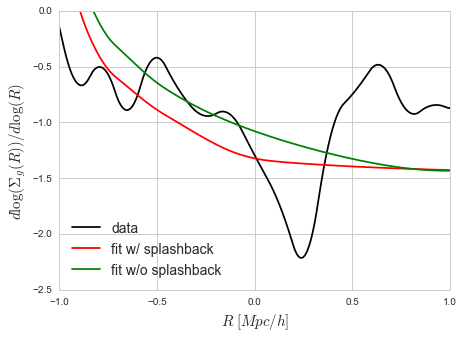

In [560]:
mplot.figure(figsize=(7,5))
ax = mplot.subplot(111)

r1, dsdr1 = derivative_savgol(rperp, sigma, N=10000, window_length=5, polyorder=3)
r2, dsdr2 = derivative_savgol(rperp[1:-1], DSigmag(rperp, z, best_params, h0, 1)[1:-1], N=10000, window_length=5, polyorder=3)
r3, dsdr3 = derivative_savgol(rperp[1:-1], DSigmag(rperp, z, best_params_nosplash, h0, 0)[1:-1], N=10000, window_length=5, polyorder=3)

print DSigmag(rperp[1:-1], z, best_params_nosplash, h0, 0)
print dsdr2
mplot.plot(r1+np.log10(h0), dsdr1, color='k', label='data')
mplot.plot(r2+np.log10(h0), dsdr2, color='r', label='fit w/ splashback')
mplot.plot(r3+np.log10(h0), dsdr3, color='g', label='fit w/o splashback')

mplot.ylim(-2.5,0)
mplot.xlim(-1,1)
mplot.legend(fontsize=14, loc='lower left')
mplot.ylabel('$d\log(\Sigma_{g}(R))/d\log(R)$', fontsize=15)
mplot.xlabel('$R \;[Mpc/h]$', fontsize=15)

